In [35]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

house_df_org = pd.read_csv('./house_price.csv')
house_df = house_df_org.copy()
house_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [36]:
print('데이터 세트의 shape:', house_df.shape)
print('\n전체 피처의 type \n', house_df.dtypes.value_counts())
insull_series = house_df.isnull().sum()
print('\nNull 칼럼과 그 건수', insull_series[insull_series > 0].sort_values(ascending=False))

데이터 세트의 shape: (1460, 81)

전체 피처의 type 
 object     43
int64      35
float64     3
Name: count, dtype: int64

Null 칼럼과 그 건수 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


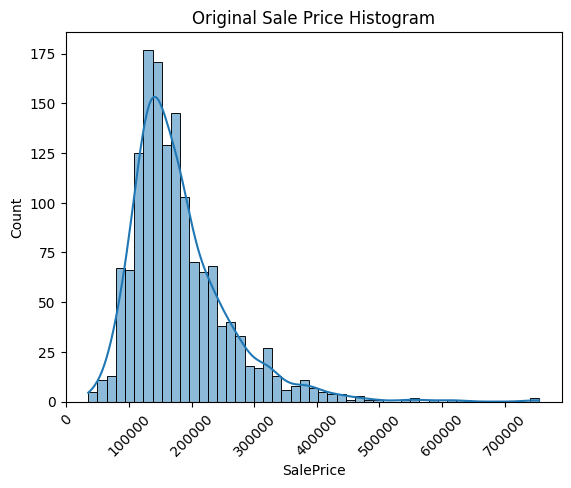

In [37]:
plt.title('Original Sale Price Histogram')
plt.xticks(rotation=45)
sns.histplot(house_df['SalePrice'], kde=True)
plt.show()

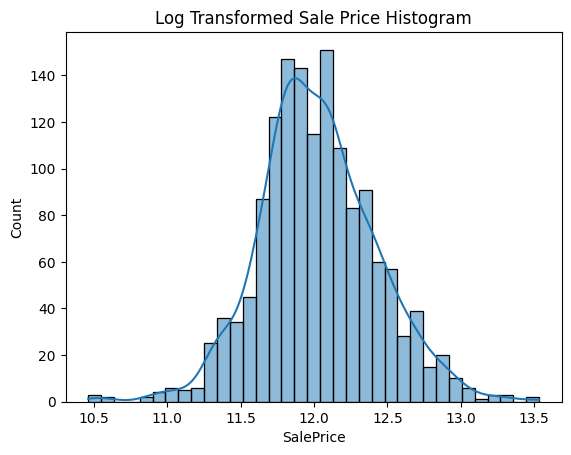

In [38]:
plt.title('Log Transformed Sale Price Histogram')
log_SalePrice = np.log1p(house_df['SalePrice'])
sns.histplot(log_SalePrice, kde=True)
plt.show()

In [39]:
# SalePrice 로그 변환
original_SalePrice = house_df['SalePrice']
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])

In [40]:
# Null이 너무 많은 칼럼과 불필요한 칼럼 삭제
house_df.drop(['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)

# 드롭하지 않는 숫자형 Null 칼럼은 평균값으로 대체
num_columns = house_df.dtypes[house_df.dtypes!='object'].index.to_list()


house_df[num_columns].fillna(house_df[num_columns].mean(), inplace=True)
house_df['LotFrontage'].fillna(house_df['LotFrontage'].mean(), inplace=True)
house_df['MasVnrArea'].fillna(house_df['MasVnrArea'].mean(), inplace=True)
house_df['GarageYrBlt'].fillna(house_df['GarageYrBlt'].mean(), inplace=True)


# Null 값이 있는 피처명과 타입을 추출
null_column_count = house_df.isnull().sum()[house_df.isnull().sum()>0]
print('## Null 피처의 Type:\n', house_df.dtypes[null_column_count.index])

## Null 피처의 Type:
 MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object


In [41]:
print('get_dummies() 수행 전 데이터 shape:', house_df.shape)
house_df_ohe = pd.get_dummies(house_df)
print('get_dummies() 수행 후 데이터 shape:', house_df_ohe.shape)

null_colmn_count = house_df_ohe.isnull().sum()[house_df_ohe.isnull().sum()>0]
print('## Null 피처의 type :\n', house_df_ohe.dtypes[null_colmn_count.index])

get_dummies() 수행 전 데이터 shape: (1460, 75)
get_dummies() 수행 후 데이터 shape: (1460, 270)
## Null 피처의 type :
 Series([], dtype: object)


In [42]:
def get_rmse(model):
	pred = model.predict(X_test)
	mse = mean_squared_error(y_test, pred)
	rmse = np.sqrt(mse)
	print(model.__class__.__name__, '로그 변환된 RMSE:', np.round(rmse, 3))
	return rmse

In [43]:
def get_rmses(models):
	rmses = []
	for model in models:
		rmse = get_rmse(model)
		rmses.append(rmse)
	return rmses

In [44]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice', axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# LinearRegression, Ridge, Lasso 학습, 예측, 평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 0.132
Ridge 로그 변환된 RMSE: 0.127
Lasso 로그 변환된 RMSE: 0.176


[0.13183184688249613, 0.1274058283626612, 0.17628250556471398]

In [46]:
def get_top_bottom_coef(model, n=10):
	# coef_ 속성을 기반으로 Series 객체를 생성. index는 컬럼명
	coef = pd.Series(model.coef_, index=X_features.columns)

	# + 상위 10개, - 하위 10개의 회귀 계수를 추출해 반환
	coef_high = coef.sort_values(ascending=False).head(n)
	coef_low = coef.sort_values(ascending=False).tail(n)
	return coef_high, coef_low

In [47]:
def visualize_coefficient(models):
	# 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
	fig, axs = plt.subplots(figsize=(24,10), nrows=1, ncols=3)
	fig.tight_layout()
	# 입력 인자로 받은 list 객체인 models에서 차레로 model을 추출해 회귀 계수 시각화
	for i_num, model in enumerate(models):
		# 상위 10, 하위 10 회귀 계수를 구하고, 이를 판다스 concat으로 결합
		coef_high, coef_low = get_top_bottom_coef(model)
		coef_concat = pd.concat([coef_high, coef_low])
		# ax subplot에 barchar로 표현. 한 화미ㅕㄴ에 표현하기 위해 tick label 위치와 font 크기 조정
		axs[i_num].set_title(model.__class__.__name__+' Coefficents', size=25)
		axs[i_num].tick_params(axis='y', direction='in', pad=-120)
		for label in (axs[i_num].get_xticklables() + axs[i_num].get_yticklabels()):
			lable.set_fondsize(22)

In [ ]:
ㅖ